In [1]:
%load_ext autoreload
%aimport helper, tests
%autoreload 1

In [2]:
import collections

import helper
import numpy as np
import pandas as pd
#import project_test

In [20]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, LSTM, Embedding, RepeatVector, GRU
import tensorflow as tf
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

In [19]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, LSTM, Embedding, RepeatVector
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

ModuleNotFoundError: No module named 'keras.layers.embeddings'

In [5]:
# Load the dataset
filename_en = './data/small_vocab_en.txt'
filename_fr = './data/small_vocab_fr.txt'
df_english = pd.read_csv(filename_en, sep='/t', names=['english'])
df_french = pd.read_csv(filename_fr, sep='/t', names=['french'])

/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [6]:
df_english["english"][0]

'new jersey is sometimes quiet during autumn , and it is snowy in april .'

In [7]:
for i in range(5):
    print('English sample {}:  {}'.format(i ,df_english["english"][i]))
    print('French sample {}:  {}\n'.format(i, df_french["french"][i]))

English sample 0:  new jersey is sometimes quiet during autumn , and it is snowy in april .
French sample 0:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .

English sample 1:  the united states is usually chilly during july , and it is usually freezing in november .
French sample 1:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .

English sample 2:  california is usually quiet during march , and it is usually hot in june .
French sample 2:  california est généralement calme en mars , et il est généralement chaud en juin .

English sample 3:  the united states is sometimes mild during june , and it is cold in september .
French sample 3:  les états-unis est parfois légère en juin , et il fait froid en septembre .

English sample 4:  your least liked fruit is the grape , but my least liked is the apple .
French sample 4:  votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .



In [8]:
english_sentences = df_english["english"]
french_sentences = df_french["french"]

# Vocabulary

In [9]:
english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


In [10]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer


In [11]:
# Tokenize english text
text_tokenized, text_tokenizer = tokenize(english_sentences)
print(text_tokenizer.word_index)
print()


{'is': 1, 'in': 2, 'it': 3, 'during': 4, 'the': 5, 'but': 6, 'and': 7, 'sometimes': 8, 'usually': 9, 'never': 10, 'favorite': 11, 'least': 12, 'fruit': 13, 'most': 14, 'loved': 15, 'liked': 16, 'new': 17, 'paris': 18, 'india': 19, 'united': 20, 'states': 21, 'california': 22, 'jersey': 23, 'france': 24, 'china': 25, 'he': 26, 'she': 27, 'grapefruit': 28, 'your': 29, 'my': 30, 'his': 31, 'her': 32, 'fall': 33, 'june': 34, 'spring': 35, 'january': 36, 'winter': 37, 'march': 38, 'autumn': 39, 'may': 40, 'nice': 41, 'september': 42, 'july': 43, 'april': 44, 'november': 45, 'summer': 46, 'december': 47, 'february': 48, 'our': 49, 'their': 50, 'freezing': 51, 'pleasant': 52, 'beautiful': 53, 'october': 54, 'snowy': 55, 'warm': 56, 'cold': 57, 'wonderful': 58, 'dry': 59, 'busy': 60, 'august': 61, 'chilly': 62, 'rainy': 63, 'mild': 64, 'wet': 65, 'relaxing': 66, 'quiet': 67, 'hot': 68, 'dislikes': 69, 'likes': 70, 'limes': 71, 'lemons': 72, 'grapes': 73, 'mangoes': 74, 'apples': 75, 'peaches':

In [12]:
# Tokenize french text
text_tokenized, text_tokenizer = tokenize(french_sentences)
print(text_tokenizer.word_index)

{'est': 1, 'en': 2, 'il': 3, 'les': 4, 'mais': 5, 'et': 6, 'la': 7, 'parfois': 8, 'jamais': 9, 'le': 10, "l'": 11, 'généralement': 12, 'moins': 13, 'aimé': 14, 'au': 15, 'fruit': 16, 'préféré': 17, 'agréable': 18, 'froid': 19, 'son': 20, 'chaud': 21, 'de': 22, 'plus': 23, 'automne': 24, 'mois': 25, 'à': 26, 'elle': 27, 'citrons': 28, 'paris': 29, 'inde': 30, 'unis': 31, 'états': 32, 'france': 33, 'jersey': 34, 'new': 35, 'chine': 36, 'pendant': 37, 'pamplemousse': 38, 'mon': 39, 'votre': 40, 'juin': 41, 'printemps': 42, 'janvier': 43, 'hiver': 44, 'mars': 45, 'été': 46, 'mai': 47, 'septembre': 48, 'juillet': 49, 'avril': 50, 'novembre': 51, 'décembre': 52, 'février': 53, 'octobre': 54, 'aime': 55, 'août': 56, 'merveilleux': 57, 'relaxant': 58, 'doux': 59, 'humide': 60, 'notre': 61, 'californie': 62, 'sec': 63, 'leur': 64, 'occupé': 65, 'pluvieux': 66, 'calme': 67, 'beau': 68, 'habituellement': 69, 'pommes': 70, 'pêches': 71, 'oranges': 72, 'poires': 73, 'fraises': 74, 'bananes': 75, 'v

In [13]:
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    return pad_sequences(x, maxlen=length, padding='post')

In [14]:
# Preprocess Pipeline

def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

In [15]:
preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =preprocess(english_sentences, french_sentences)
    
max_english_sequence_length = preproc_english_sentences.shape[1]
max_french_sequence_length = preproc_french_sentences.shape[1]
english_vocab_size = len(english_tokenizer.word_index)
french_vocab_size = len(french_tokenizer.word_index)

print('Data Preprocessed')
print("Max English sentence length:", max_english_sequence_length)
print("Max French sentence length:", max_french_sequence_length)
print("English vocabulary size:", english_vocab_size)
print("French vocabulary size:", french_vocab_size)

Data Preprocessed
Max English sentence length: 15
Max French sentence length: 21
English vocabulary size: 199
French vocabulary size: 344


# Simple RNN 

In [30]:
from tensorflow.keras.metrics import sparse_top_k_categorical_accuracy

In [51]:
def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # Hyperparameters
    learning_rate = 0.005
    
    # TODO: Build the layers
    model = Sequential()
    model.add(GRU(256, input_shape=input_shape[1:], return_sequences=True))
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense((french_vocab_size+1), activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [52]:
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, max_french_sequence_length)
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

# Train the neural network
simple_rnn_model = simple_model(tmp_x.shape,max_french_sequence_length,
    english_vocab_size,
    french_vocab_size)

In [53]:
tmp_x.shape

(137860, 21, 1)

In [54]:
print(simple_rnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 21, 256)           198912    
                                                                 
 time_distributed_10 (TimeDi  (None, 21, 1024)         263168    
 stributed)                                                      
                                                                 
 dropout_5 (Dropout)         (None, 21, 1024)          0         
                                                                 
 time_distributed_11 (TimeDi  (None, 21, 345)          353625    
 stributed)                                                      
                                                                 
Total params: 815,705
Trainable params: 815,705
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
history = simple_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2)

Epoch 1/10
108/108 [==============================] - 176s 2s/step - loss: 0.9783 - accuracy: 0.6885 - val_loss: 0.8903 - val_accuracy: 0.7093
Epoch 2/10
108/108 [==============================] - 174s 2s/step - loss: 0.9325 - accuracy: 0.6957 - val_loss: 0.8947 - val_accuracy: 0.7000
Epoch 3/10
108/108 [==============================] - 183s 2s/step - loss: 0.8918 - accuracy: 0.7040 - val_loss: 0.8267 - val_accuracy: 0.7177
Epoch 4/10
108/108 [==============================] - 188s 2s/step - loss: 0.8568 - accuracy: 0.7128 - val_loss: 0.7869 - val_accuracy: 0.7345
Epoch 5/10
108/108 [==============================] - 183s 2s/step - loss: 0.8561 - accuracy: 0.7074 - val_loss: 0.7803 - val_accuracy: 0.7314
Epoch 6/10
108/108 [==============================] - 176s 2s/step - loss: 0.8224 - accuracy: 0.7156 - val_loss: 0.7396 - val_accuracy: 0.7360
Epoch 7/10
108/108 [==============================] - 174s 2s/step - loss: 0.7914 - accuracy: 0.7259 - val_loss: 0.6912 - val_accuracy: 0.7639

In [58]:
from matplotlib import pyplot as plt

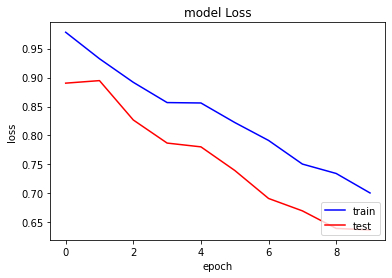

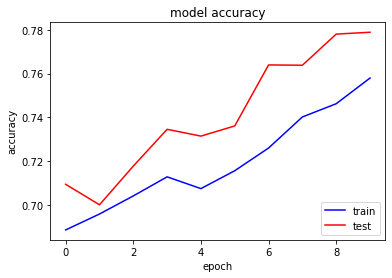

In [61]:
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model_loss_RNN.png')
plt.show()


plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model_accuracy_RNN.png')
plt.show()

In [64]:
# Print prediction(s)
print(logits_to_text(simple_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

NameError: name 'logits_to_text' is not defined

In [67]:
#seq2seq

In [99]:
tmp_x.shape

(137860, 21, 1)

In [102]:
max_french_sequence_length

21

In [125]:
HIDDEN_DIM=256

model_s2s = Sequential()
#encoder
model_s2s.add(Input(shape=tmp_x.shape[0], dtype='int32',))

model_s2s.add(Embedding(input_dim = english_vocab_size,
                    output_dim = tmp_x.shape[1],
                    input_length= max_english_sequence_length))

model_s2s.add(LSTM(HIDDEN_DIM, return_sequences=True))


#decoder
model_s2s.add(Input(shape=tmp_x.shape, dtype='int32',))

model_s2s.add(Embedding(input_dim = english_vocab_size,
                    output_dim = max_french_sequence_length,
                    input_length= max_english_sequence_length) )

#model.add(LSTM(HIDDEN_DIM,return_sequences=True))

model_s2s.add( TimeDistributed(Dense(french_vocab_size+1, activation='softmax')))

model_s2s.compile()

In [126]:
model_s2s.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 137860, 21)        4179      
                                                                 
 lstm_21 (LSTM)              (None, 137860, 256)       284672    
                                                                 
 input_39 (InputLayer)       multiple                  0         
                                                                 
 embedding_32 (Embedding)    (None, 137860, 256, 21)   4179      
                                                                 
 time_distributed_18 (TimeDi  (None, 137860, 256, 345)  7590     
 stributed)                                                      
                                                                 
Total params: 300,620
Trainable params: 300,620
Non-trainable params: 0
_______________________________________________

In [121]:
tmp_x.shape

(137860, 21, 1)

In [122]:
preproc_french_sentences.shape

(137860, 21, 1)

In [123]:
history = model_s2s.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    File "/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/keras/engine/input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_28" is incompatible with the layer: expected shape=(None, 137860), found shape=(None, 21, 1)
